In [1]:
import pandas as pd

df_tayara = pd.read_csv("data/raw/tayara.csv")
df_mubawab = pd.read_csv("data/raw/mubawab.csv")
df_immobilier = pd.read_csv("data/raw/immobilier.csv")

In [ ]:

cities_mubawab = df_mubawab.iloc[:, -1].str.strip()
unique_cities_mubawab = sorted(cities_mubawab.unique())

cities_tayara = df_tayara.iloc[:, -1].str.strip()
unique_cities_tayara = sorted(cities_tayara.unique())

cities_immobilier = df_immobilier.iloc[:, -1].str.strip()
unique_cities_immobilier = sorted(
    df_immobilier.iloc[:, -1]
    .dropna()
    .astype(str)
    .str.strip()
    .unique()
)

print(unique_cities_mubawab)
print(unique_cities_tayara)
print(unique_cities_immobilier)


['Aghir', 'Ajim', 'Akouda', 'Al-Qayrawan', 'Ariana', 'Aïn Draham', 'Barraket Essahel', 'Bekalta', 'Ben Arous', 'Beni Khalled', 'Beni Khiar', 'Bir Bouregba', 'Bizerte', 'Bizerte Nord', 'Bizerte Sud', 'Bou Arada', 'Bou Argoub', 'Bou Salem', 'Bouficha', 'Boumhel Bassatine', 'Béja', 'Carthage', 'Chebba', 'Cité De La Plage 1', 'Cité El Khadra', 'Cité El Menzah', 'Cité Ennarjes 1', 'Cité Ennouzha', 'Cité Ezzouhour 2', 'Cité Ezzouhour 3', 'Cité Hached', 'Cité Jaouhara', 'Cité Presidentielle', 'Cité Taieb Mhiri', 'Dar Châabane', 'Djerba', 'Douar Hicher', 'Douz', 'El Ain', 'El Alia', 'El Aouina', 'El Hamma', 'El Haouaria', 'El Hrairia', 'El Kabaria', 'El Ksar', 'El Maamoura', 'El Menzah', 'El Mida', 'El Mourouj', 'El Omrane', 'El Omrane Superieur', 'El Ouardia', 'Enfidha', 'Essouassi', 'Ettadhamen', 'Ettahrir', 'Ezzahra', 'Fouchana', 'Gabès', 'Gabès Sud', 'Gafsa', 'Gafsa Sud', 'Ghar El Melh', 'Grombalia', 'Hammam Chatt', 'Hammam El Ghezaz', 'Hammam Ghezèze', 'Hammam Lif', 'Hammam Sousse', 'Hamm

### Data Inspection


In [7]:
df_mubawab.info()
df_mubawab.head()

df_tayara.info()
df_tayara.head()

df_immobilier.info()
df_immobilier.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6587 entries, 0 to 6586
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chambres          6587 non-null   int64  
 1   prix              6587 non-null   float64
 2   source            6587 non-null   object 
 3   surface           6587 non-null   float64
 4   titre             6587 non-null   object 
 5   type_bien         6587 non-null   object 
 6   type_transaction  6587 non-null   object 
 7   ville             6587 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 411.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chambres          1921 non-null   int64  
 1   prix              1921 non-null   float64
 2   source            1921 non-null   object 
 3   surface       

,chambres,prix,source,surface,titre,type_bien,type_transaction,ville
0,2,1600.0,immobilier,80.0,Au coeur de la marsa,Appart,À Vendre,Tunis
1,2,1600.0,immobilier,140.0,Appartement rayen à lannée hammamet,Appart,À Vendre,Nabeul
2,2,900.0,immobilier,100.0,"Bureau s2 à lafayette, tunis.",Appart,À Vendre,Tunis
3,2,800.0,immobilier,80.0,"Superbes appartements s2 neufs à gremda km 7,5",Appart,À Vendre,Sfax
4,4,275.0,immobilier,122.0,À vendre appartement s3 la marsa,Appart,À Vendre,Tunis


###  Merge

In [8]:
import pandas as pd

df_all = pd.concat(
    [df_mubawab, df_tayara, df_immobilier],
    ignore_index=True
)

print(df_all.shape)


(9234, 8)


### Normalize City Names

In [9]:
import re
import unidecode

def normalize_city(city):
    if not isinstance(city, str):
        return None
    city = city.strip().lower()
    city = unidecode.unidecode(city)
    city = re.sub(r"\s+", " ", city)
    return city

df_all["city_raw"] = df_all["ville"]
df_all["city_norm"] = df_all["city_raw"].apply(normalize_city)


### City to Government mapping

In [10]:
CITY_TO_GOV = {
    # TUNIS
    "tunis": "Tunis",
    "la marsa": "Tunis",
    "carthage": "Tunis",
    "le bardo": "Tunis",
    "le kram": "Tunis",
    "la goulette": "Tunis",
    "el omrane": "Tunis",
    "el omrane superieur": "Tunis",
    "el kabaria": "Tunis",
    "el hrairia": "Tunis",
    "sidi hassine": "Tunis",

    # ARIANA
    "ariana": "Ariana",
    "raoued": "Ariana",
    "sidi thabet": "Ariana",
    "el menzah": "Ariana",
    "ennasr": "Ariana",

    # BEN AROUS
    "ben arous": "Ben Arous",
    "benarous": "Ben Arous",
    "rades": "Ben Arous",
    "ezzahra": "Ben Arous",
    "boumhel bassatine": "Ben Arous",
    "hammam chatt": "Ben Arous",
    "hammam lif": "Ben Arous",

    # MANOUBA
    "la manouba": "Manouba",
    "lamanouba": "Manouba",
    "douar hicher": "Manouba",

    # NABEUL
    "nabeul": "Nabeul",
    "hammamet": "Nabeul",
    "hammamet nord": "Nabeul",
    "korba": "Nabeul",
    "kelibia": "Nabeul",
    "takelsa": "Nabeul",
    "soliman": "Nabeul",
    "dar chaabane": "Nabeul",

    # SOUSSE
    "sousse": "Sousse",
    "sahloul": "Sousse",
    "khezama est": "Sousse",
    "khezama ouest": "Sousse",
    "jaouhara": "Sousse",
    "tantana": "Sousse",
    "hammam sousse": "Sousse",

    # SFAX
    "sfax": "Sfax",
    "sfax sud": "Sfax",
    "sfax ouest": "Sfax",

    # MONASTIR
    "monastir": "Monastir",
    "jemmal": "Monastir",
    "ksar hellal": "Monastir",

    # MAHDIA
    "mahdia": "Mahdia",
    "chebba": "Mahdia",

    # GABES
    "gabes": "Gabes",
    "gabs": "Gabes",

    # MEDNINE
    "medenine": "Mednine",
    "mdenine": "Mednine",
    "djerba": "Mednine",
    "houmt souk": "Mednine",
    "midoun": "Mednine",

    # KAIROUAN
    "kairouan": "Kairouan",

    # KASSERINE
    "kasserine": "Kasserine",

    # GAFSA
    "gafsa": "Gafsa",

    # TOZEUR
    "tozeur": "Tozeur",

    # ZAGHOUAN
    "zaghouan": "Zaghouan",
}


In [11]:
df_all["governorate"] = df_all["city_norm"].map(CITY_TO_GOV)


### Drop ligns with empty column values

In [12]:
before = df_all.shape[0]
df_all = df_all.dropna(subset=["governorate", "surface", "prix", "chambres"])
after = df_all.shape[0]

print(f"Dropped {before - after} rows")


Dropped 1894 rows


In [13]:
df_all["governorate"].value_counts()


governorate
Tunis        2779
Nabeul       1556
Ariana       1169
Sousse        789
Ben Arous     369
Mednine       231
Manouba       109
Monastir      100
Sfax           95
Mahdia         84
Kairouan       39
Zaghouan        6
Gafsa           4
Gabes           4
Kasserine       3
Tozeur          3
Name: count, dtype: int64

### After cleaning inspection


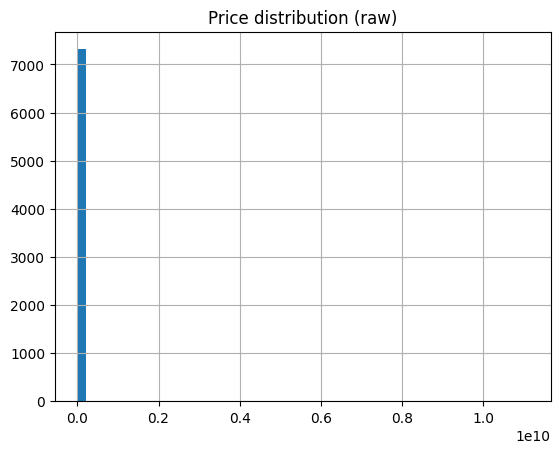

In [14]:
import matplotlib.pyplot as plt

df_all["prix"].hist(bins=50)
plt.title("Price distribution (raw)")
plt.show()


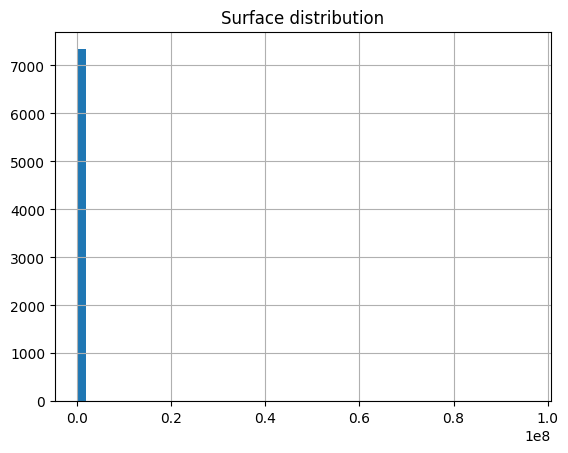

In [15]:
df_all["surface"].hist(bins=50)
plt.title("Surface distribution")
plt.show()


In [ ]:
#drop type_transaction column as they are all a vendre
df_all = df_all.drop(columns=["type_transaction"])


In [24]:
#drop city_raw column
df_all = df_all.drop(columns=["city_raw"])

In [28]:
# drop source column
df_all = df_all.drop(columns=["source"])


### Renaming and saving final csv

In [29]:

df_clean = df_all.rename(columns={
    "prix": "price",
    "surface": "surface",
    "chambres": "rooms",
    "type_bien": "property_type",
})

df_clean = df_clean[
    [
        "price",
        "surface",
        "rooms",
        "governorate",
        "property_type",
    ]
]
df_clean.info()
df_clean.to_csv("data/clean/clean_housing_tunisia.csv", index=False)



<class 'pandas.core.frame.DataFrame'>
Index: 7340 entries, 0 to 9233
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          7340 non-null   float64
 1   surface        7340 non-null   float64
 2   rooms          7340 non-null   int64  
 3   governorate    7340 non-null   object 
 4   property_type  7340 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 344.1+ KB
